In [3]:
import quandl as qn
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard
from sliding_window import sliding_window  ## Defined functions ## 
from AutoEncoder import AutoEncoder
from AutoEncoderMLP import AutoEncoderMLP
from outliers import outliers 
import warnings
warnings.filterwarnings("ignore")

qn.ApiConfig.api_key = "HQV7bdPFvAn1QUxxkN5c"
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [4]:
Data=[]
Companies=["EOD/GOOGL"]#,"EOD/FB","EOD/AAPL","EOD/AMZN"]#,"EOD/MSFT"]
InitDate="2012-05-20"
EndDate="2017-12-01"
for company in Companies:
    data=qn.get(company, start_date=InitDate, end_date=EndDate,collapse="daily", transformation='rdiff')
    Data.append(data['Close'])

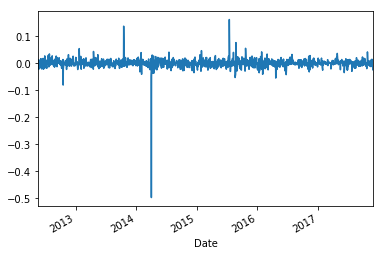

In [5]:
# We make decision to measure sigma and cut the outliers based upon of sigmas # 
Outliers=[]
Data_NO=copy.deepcopy(Data) ## Without outliers ## Data_NO
Data[0].plot()
plt.show()

Original Data:
std: 0.019213 
mean: 0.000599 


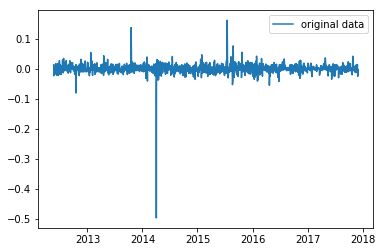

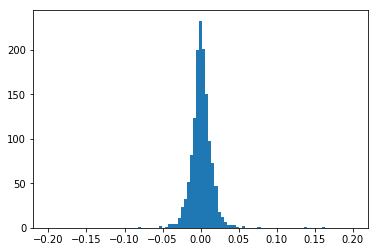

End of original data and start cutting outliers with respect to distribution 
 ############# 

std without outliers  : 0.019213 
mean without outliers : 0.000599 
(104, -0.080067241128274)
(167, 0.054960376741075997)
(354, 0.13795772698736)
(468, -0.49652013038498999)
(792, 0.16258433314500001)
(817, -0.052172249367162998)
(820, 0.077179290414224)
(861, 0.056067768740640997)
(985, -0.054141025641025999)


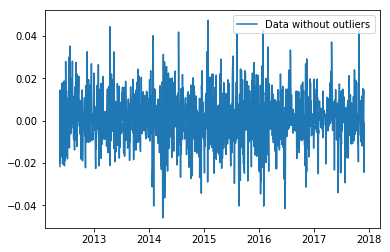

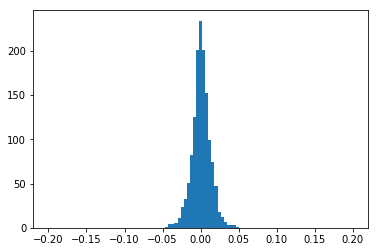

End of removing outliers from data and start scaling the data with no outliers 
 ############# 

std of scaled : 0.252715 
mean of scaled: 0.015208 


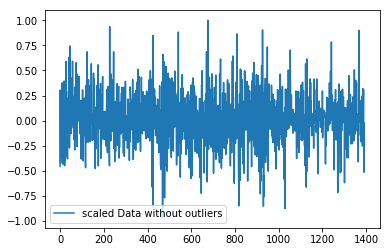

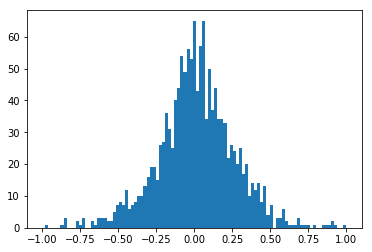

In [6]:
'''
Data[0].plot()    
Data_NO[0].plot()
sData[0].plot()
plt.show()    
plt.clf()
plt.hist(Data[0])
plt.show()
plt.clf()
plt.hist(Data_NO[0])
plt.show()
'''

bins = np.linspace(-0.2, 0.2, 100)
print("Original Data:")
print("std: %f " %np.std(Data[0]))
print("mean: %f " %np.mean(Data[0]))
plt.clf()
a1=plt.plot(Data[0],label="original data")
plt.legend(handles=a1)
plt.show()

plt.clf()
plt.hist(Data[0],bins)
plt.show()


print("End of original data and start cutting outliers with respect to distribution \n ############# \n")


print("std without outliers  : %f " %np.std(Data_NO[0]))
print("mean without outliers : %f " %np.mean(Data_NO[0]))

plt.clf()
outliers(Data_NO,-0.05,0.05)
a1=plt.plot(Data_NO[0],label="Data without outliers")
plt.legend(handles=a1)
plt.show()

plt.clf()
plt.hist(Data_NO[0],bins)
plt.show()


#plt.clf()
#Data_NO[0].plot()
#plt.show()

print("End of removing outliers from data and start scaling the data with no outliers \n ############# \n")


#sData.append(max_abs_scaler.fit_transform(Data_NO[0])
#scaler = MinMaxScaler()
#serries_scaled=[]
max_abs_scaler = preprocessing.MaxAbsScaler()
sData=[]
for i in range(len(Data_NO)):
    data=pd.DataFrame(max_abs_scaler.fit_transform(Data_NO[0]))         
#    data=pd.DataFrame(scaler.fit_transform(Data_NO[i]))#, columns=Data_NO[i].columns)
    sData.append(data)



print("std of scaled : %f " %np.std(sData[0]))
print("mean of scaled: %f " %np.mean(sData[0]))

#np.mean(Data_NO[0])*len()

sbins = np.linspace(-1.0, 1.0, 100)

plt.clf()
#outliers(Data_,-0.05,0.05)
a1=plt.plot(sData[0],label="scaled Data without outliers")
plt.legend(handles=a1)
plt.show()

plt.clf()
plt.hist(sData[0],sbins)
plt.show()


#print np.mean(Data[0])
#df_sGoogle = pd.DataFrame(scaler.fit_transform(df_google), columns=df_google.columns)
#df_sFb = pd.DataFrame(scaler.fit_transform(df_fb), columns=df_fb.columns)
#df_sApple = pd.DataFrame(scaler.fit_transform(df_apple), columns=df_apple.columns)
#df_sMic = pd.DataFrame(scaler.fit_transform(df_mic), columns=df_mic.columns)
#df_sAmz = pd.DataFrame(scaler.fit_transform(df_amz), columns=df_amz.columns)